# 13.4. Simulating a stochastic differential equation

1. Let's import NumPy and matplotlib.

In [161]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sigma = 10.0  # Standard deviation.
mu = 100.0  # Mean.
tau = 1  # Time constant.

dt = .01  # Time step.
T = 10.  # Total time.
n = int(T/dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.



# ---------------------------------------



sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

x = np.zeros(n)

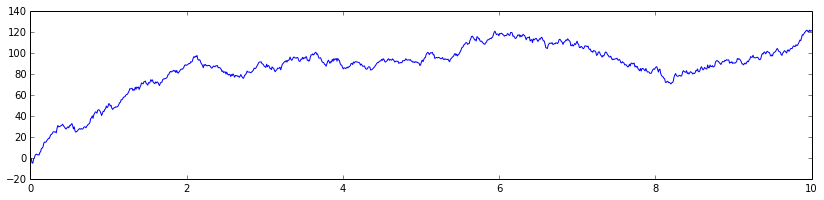

In [162]:
# 6. Now, we simulate the process with the Euler-Maruyama method. 
# It is really like the standard Euler method for ODEs, but with 
# an extra stochastic term (which is just a scaled normal random variable). 

for i in range(n-1):
    x[i+1] = x[i] + dt*(-(x[i]-mu)/tau) + \
             sigma_bis * sqrtdt * np.random.randn()

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)
ax.plot(t, x, 'b-');


In [165]:
# 8. Now, we are going to take a look at the time evolution 
# of the distribution of the process. To do that, we will 
# simulate many independent realizations of the same process 
# in a vectorized way. We define a vector `X` that will contain 
# all realizations of the process at a given time 
# (i.e. we do not keep the memory of all realizations at all times). 
# This vector will be completely updated at every time step. 
# We will show the estimated distribution (histograms) at several points in time.

ntrials = 1000

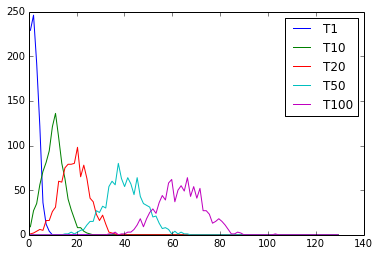

In [166]:
X = np.zeros(ntrials)

# We create bins for the histograms.
bins = np.linspace(0,mu+3*sigma,100);

fig = plt.figure();
ax = fig.gca();

for i in range(n):
    
    # We update the process independently for all trials.
    X += dt*(-(X-mu)/tau) + \
        sigma_bis*sqrtdt*np.random.randn(ntrials)

    if i in (1,10,20,50,100):
        hist, _ = np.histogram(X, bins=bins)

        ax.plot( (bins[1:]+bins[:-1])/2, hist, label="T%d"%(i) )
        
    plt.legend()
    
    '''
    # We display the histogram for a few points in time.
    if i in (): # (1,5,10,20,100):
        hist, _ = np.histogram(X, bins=bins)
        plt.plot((bins[1:]+bins[:-1])/2, hist,
                 {1: '-', 5: '-', 10: '-', 20: '-', 100:'-'}[i],
                 label="t={0:.3f}".format(i*dt));
    plt.legend();
    '''
